## k-NN Algorithm Implementation with the Penguins Dataset


##**Introduction**

In this project we explore how the k-Nearest Neighbors (k-NN) algorithm can be used to classify different species of penguins from the Palmer Penguins dataset.

Our goal is to predict the species of a penguin based on simple physical measurements such as bill length, bill depth, flipper length, and body mass.

**Why we choose Penguins dataset?**

We wanted to use an interesting and realistic dataset similar to the famous Iris dataset.
The Palmer Penguins dataset serves as a modern, more relatable alternative.

Penguins make a great example for classification because their physical features clearly differ across species.

The dataset includes three types of penguins:

Adelie

Chinstrap

Gentoo

By comparing these traits, we can visualize how the k-NN algorithm groups similar individuals and separates different species based on their similarities.

In this project, we train and test a k-NN model, experiment with different parameters, and evaluate its performance using accuracy, confusion matrices, and cross-validation.



## **Part 1: Familiarization and Basic Testing of the kNN Algorithm**

**1.1 Import required libraries
 :**



In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



**1.2 Loading and exploring and preparing the
dataset
 :**

In [ ]:
# Load the dataset
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
# count missing values
penguins.count()

,0
species,344
island,344
bill_length_mm,342
bill_depth_mm,342
flipper_length_mm,342
body_mass_g,342
sex,333


In [ ]:
# dropping null values and taking the count again
penguins = penguins.dropna()
penguins.count()

,0
species,333
island,333
bill_length_mm,333
bill_depth_mm,333
flipper_length_mm,333
body_mass_g,333
sex,333


In [ ]:
# Define features and target
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target = 'species'

# Encode target labels numerically
le = LabelEncoder()
target_encoded = le.fit_transform(penguins[target])

# Create clean dataframe
penguins_df = pd.DataFrame(
    data=np.c_[penguins[features], target_encoded],
    columns=features + ['target']
)

# Assign features and target to x and y
x = penguins_df[features]
y = penguins_df['target']

print("Cleaned DataFrame preview:")
penguins_df

Cleaned DataFrame preview:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,target
0,39.1,18.7,181.0,3750.0,0.0
1,39.5,17.4,186.0,3800.0,0.0
2,40.3,18.0,195.0,3250.0,0.0
3,36.7,19.3,193.0,3450.0,0.0
4,39.3,20.6,190.0,3650.0,0.0
...,...,...,...,...,...
328,47.2,13.7,214.0,4925.0,2.0
329,46.8,14.3,215.0,4850.0,2.0
330,50.4,15.7,222.0,5750.0,2.0
331,45.2,14.8,212.0,5200.0,2.0


In [ ]:
# feature columns
x

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
328,47.2,13.7,214.0,4925.0
329,46.8,14.3,215.0,4850.0
330,50.4,15.7,222.0,5750.0
331,45.2,14.8,212.0,5200.0


In [ ]:
y #target

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
328,2.0
329,2.0
330,2.0
331,2.0


**1.3 Data visualization :**








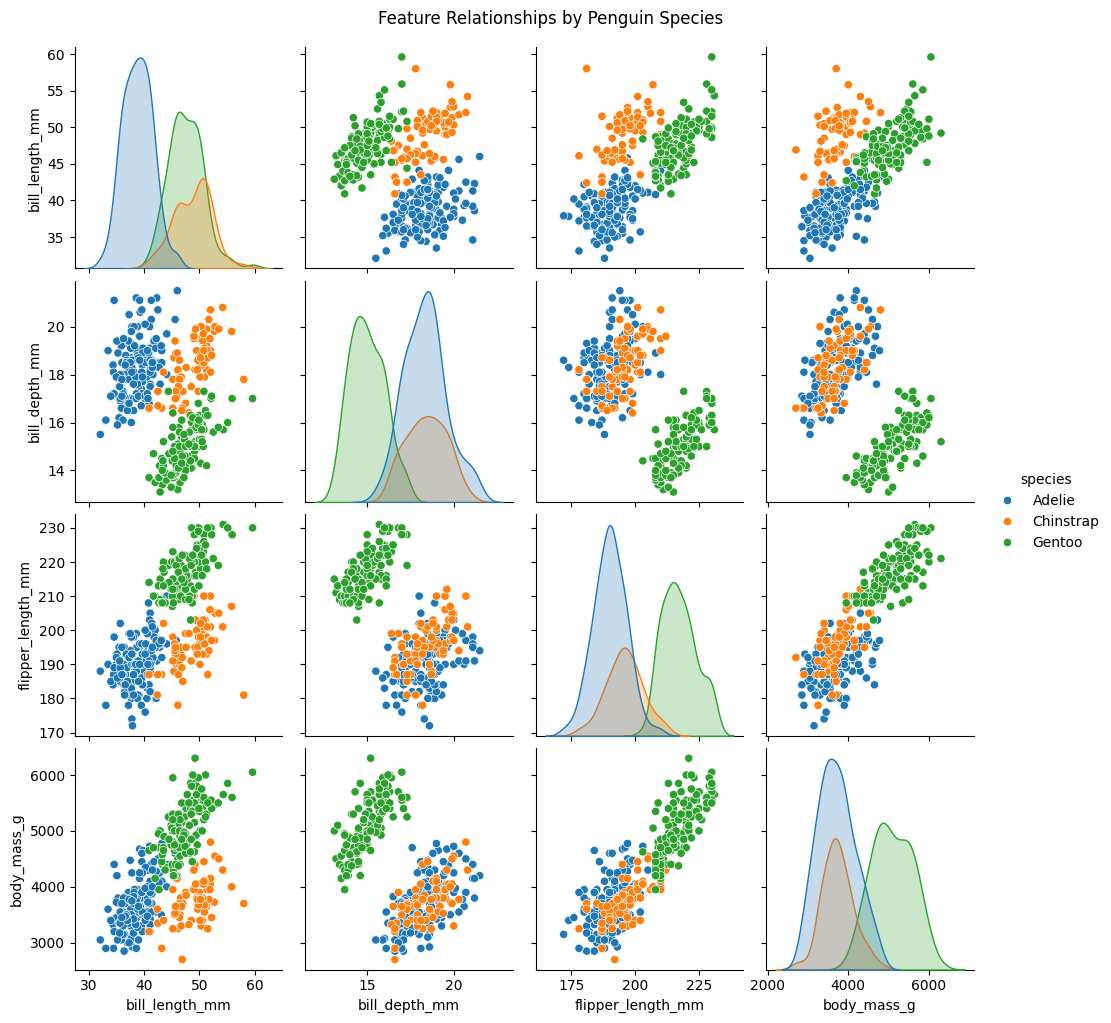

In [ ]:
# Exploratory Data visualisation (EDA)
sns.pairplot(penguins, hue='species', diag_kind='kde',
             vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
plt.suptitle("Feature Relationships by Penguin Species", y=1.02)
plt.show()


 **1.4 Splitting Data for Training and Testing, and Standardizing Features**

Before we can train the model, we need to divide the dataset into **training** and **testing** parts.

- **Training data**: Used by the model to learn patterns.
- **Testing data**: Used to check how well the model performs on unseen data.

We use the **train_test_split()** function to randomly divide the data - 80% for training and 20% for testing.

After splitting, we apply **Standardization** using **StandardScaler**:


In [ ]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### **1.5 Training and Evaluating the Base kNN Model**

Here we train a **k-Nearest Neighbors (kNN)** model with `k = 3`.

- The model checks the **3 nearest data points** in the training set for each test penguin.  
- It predicts the species based on which class appears most often among those neighbors.

We test how well the model performs using:
- **Accuracy Score** – how many predictions are correct.  
- **Classification Report** – shows detailed scores for each species.  
- **Confusion Matrix** – compares actual and predicted species.

---

#### **Understanding the Confusion Matrix**

- The **diagonal values** show correct predictions.  
- The **off-diagonal values** show mistakes (when one species is predicted as another).  

In our case, most values are on the diagonal, which means the model correctly identified most penguins with very few errors.


In [ ]:
# Apply knn
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [ ]:
# Evaluate
print("\nBase Model Performance (k=3):")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))



Base Model Performance (k=3):
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



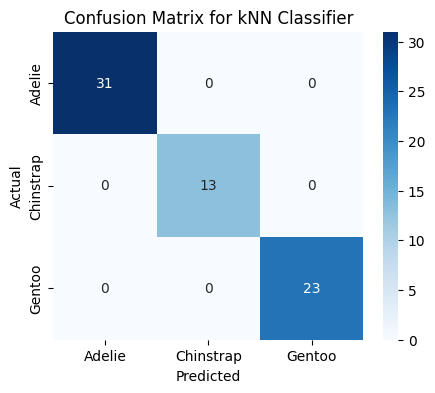

In [ ]:
# Evaluate - Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for kNN Classifier')
plt.show()


**1.6 Use Case Identification - real world applications**






1. **Customer Segmentation and Recommendation Systems**

  *   Businesses often use k-NN to group customers based on their purchase history, browsing behavior, or preferences.

  *   By finding customers who are 'nearest' in terms of purchase history or interests, companies can group them into segments or suggest products they are likely to enjoy.

  *   Example: Online retailers like Amazon use nearest-neighbor methods to recommend items similar to those a user has viewed or purchased.


2. **Medical Diagnosis and Healthcare Analytics**

  *   In healthcare, k-NN can support doctors and researchers by classifying patients based on medical test results or symptoms.

  *   By comparing a new patient’s data with records of past patients, the algorithm can help predict whether a condition (like diabetes or cancer) is present.
  *  Example: A k-NN classifier can predict whether a tumor is benign or malignant based on its measured features.


## **Part 2: In-Depth Experimentation with the kNN Algorithm**

**2.1 Parameter Experimentation**

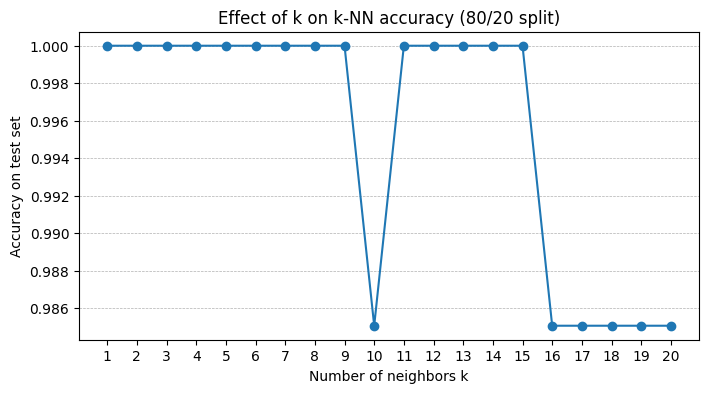

In [ ]:
import matplotlib.pyplot as plt

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(x_train, y_train)
    y_pred = knn_k.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))


plt.figure(figsize=(8,4))
plt.plot(list(k_values), accuracies, marker='o')
plt.xlabel('Number of neighbors k')
plt.ylabel('Accuracy on test set')
plt.title('Effect of k on k-NN accuracy (80/20 split)')
plt.xticks(list(k_values))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

The graph shows how the number of neighbours (k) affects the accuracy of the k-Nearest Neighbours (k-NN) algorithm when using an 80/20 train-test split.

 We have different values of k on the x-axis, from 1 to 20, and we have the accuracy on the test set on the y-axis.

 We can see from the graph that:

 - The model gets very close to 1.0 (or 100%) accuracy when k is between 1 and 10.

 - The accuracy drops sharply around k = 10, which means that the model isn't working well at this point.

 - As k goes up more, the accuracy goes back up a little and stays close to 1.0 again until k = 15. After that, it goes down again when k gets bigger (around 16–20).
This behavior shows that smaller k values tend to perform better because they focus on the nearest data points and capture local patterns more accurately.
However, larger k values make the model consider more neighbors, which can smooth out the decision boundary and reduce accuracy.

In summary, the best model performance is achieved at smaller k values (around 3–7), while very large k values slightly decrease the accuracy.

In [ ]:
# Print values
for k,a in zip(k_values, accuracies):
    print(f"k={k:2d} -> Accuracy={a:.3f}")


k= 1 -> Accuracy=1.000
k= 2 -> Accuracy=1.000
k= 3 -> Accuracy=1.000
k= 4 -> Accuracy=1.000
k= 5 -> Accuracy=1.000
k= 6 -> Accuracy=1.000
k= 7 -> Accuracy=1.000
k= 8 -> Accuracy=1.000
k= 9 -> Accuracy=1.000
k=10 -> Accuracy=0.985
k=11 -> Accuracy=1.000
k=12 -> Accuracy=1.000
k=13 -> Accuracy=1.000
k=14 -> Accuracy=1.000
k=15 -> Accuracy=1.000
k=16 -> Accuracy=0.985
k=17 -> Accuracy=0.985
k=18 -> Accuracy=0.985
k=19 -> Accuracy=0.985
k=20 -> Accuracy=0.985


These numbers show how the number of neighbours (k) affects how accurate the k-NN model is.
 - The accuracy stays perfect (1.000) when k is between 1 and 15, which shows that the classification performance is very good.
 - The accuracy goes down a little to 0.985 as k goes up past 15, which shows that the model gets less accurate as it averages over more neighbours.

 This shows that it's important to choose the right value for k.
 Smaller k values tend to find more detailed data patterns, while bigger k values can smooth out results too much and make them less accurate.
 In general, k values between 3 and 7 give the most accurate results for this dataset.

**2.2 Train-Test Split Analysis**

In [ ]:
# we can test different split ratios and compare accuracies
print("\nTrain/Test split analysis (k=5):")
split_ratios = [0.1, 0.2, 0.3, 0.4]
for ratio in split_ratios:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ratio, random_state=42, stratify=y)
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(f"Train-Test Split {int((1-ratio)*100)}/{int(ratio*100)} → Accuracy: {accuracy_score(y_test, y_pred):.3f}")


Train/Test split analysis (k=5):
Train-Test Split 90/10 → Accuracy: 1.000
Train-Test Split 80/20 → Accuracy: 1.000
Train-Test Split 70/30 → Accuracy: 1.000
Train-Test Split 60/40 → Accuracy: 0.985


The Train-Test Split Analysis demonstrates how varying the proportion of training and testing data affects the accuracy of the k-NN algorithm.
With larger training ratios such as 90/10 and 80/20, the model achieves perfect accuracy (1.000), showing it has enough data to learn effectively.
As the training data decreases, such as in the 60/40 split, the accuracy slightly drops to 0.985, indicating a minor loss in performance due to limited learning data.

Overall, the results suggest that maintaining a balanced but sufficiently large training set helps the k-NN model achieve better and more stable accuracy.

**2.3 k-Fold Cross-Validation**





5-Fold Cross-Validation Results (k=5):
Fold Accuracies: [0.97  0.985 0.985 0.985 1.   ]
Mean CV Accuracy: 0.985
Std Dev: 0.009


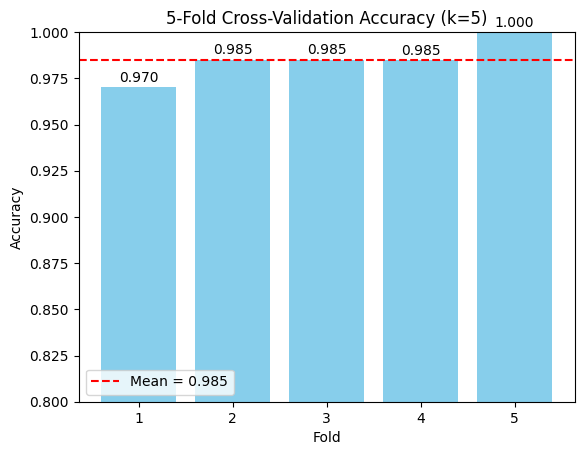

In [ ]:
pipe_knn = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(pipe_knn, scaler.fit_transform(x), y, cv=5)

print("\n5-Fold Cross-Validation Results (k=5):")
print("Fold Accuracies:", np.round(cv_scores, 3))
print("Mean CV Accuracy:", round(cv_scores.mean(), 3))
print("Std Dev:", round(cv_scores.std(), 3))

plt.bar(range(1,6), cv_scores, color='skyblue')
for i, v in enumerate(cv_scores):
    plt.text(i+1, v+0.003, f"{v:.3f}", ha='center', fontsize=10)
plt.axhline(np.mean(cv_scores), color='red', linestyle='--', label=f'Mean = {cv_scores.mean():.3f}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross-Validation Accuracy (k=5)')
plt.ylim(0.8, 1.0)
plt.legend()
plt.show()

The chart illustrates the results of a 5-fold cross-validation performed on the kNN model. The x axis represents the fold numbers (1 to 5), while the y axis shows the accuracy achieved in each fold. Each blue bar indicates the model’s accuracy for a specific fold, and the red dashed line represents the mean cross-validation accuracy.

The fold accuracies range from 0.97 to 1.00, demonstrating that the model performs consistently across all data splits. The mean accuracy is 0.985 (98.5%), and the standard deviation is 0.009, indicating minimal variation between folds. This suggests that the model’s performance is stable and reliable, with no significant overfitting or underfitting observed.

Overall, the cross-validation results show that the KNN model with k = 5 achieves high accuracy and generalizes well to unseen data.

### **Conclusion**



1. We successfully applied the k-NN algorithm to classify penguin species using measurable physical traits.

2. The process included data cleaning, feature scaling, model training, and
evaluation.

3. Different values of k, train-test splits, and k-fold cross-validation were tested to check model performance and consistency.

4. The model showed strong and stable accuracy across different configurations.

5. Smaller k values captured fine details, while larger k values improved overall generalization.

6. Overall, k-NN proved to be a simple yet effective algorithm that’s easy to understand and interpret.

